# Check cousins

Given the binary Tree and two nodes say 'p' and 'q'.
Determine whether the two nodes are cousins of each other or not. Two nodes are said to be cousins of each other it they are at same level of the Binary Tree and have different parents.
Do it in O(n).

In [1]:
from collections import deque

# Define a TreeNode class for the binary tree.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def are_cousins(root: TreeNode, p: int, q: int) -> bool:
    if not root:
        return False
    
    # BFS queue that stores (node, parent) tuples
    queue = deque([(root, None)])
    
    while queue:
        p_parent = None
        q_parent = None
        level_size = len(queue)
        
        # Process all nodes at the current level
        for _ in range(level_size):
            node, parent = queue.popleft()
            
            # Check if we found p or q and record their parents
            if node.val == p:
                p_parent = parent
            if node.val == q:
                q_parent = parent
            
            # Add the children to the queue
            if node.left:
                queue.append((node.left, node))
            if node.right:
                queue.append((node.right, node))
        
        # After processing the level, check if both p and q were found
        if p_parent and q_parent:
            # If both have different parents, they are cousins
            return p_parent != q_parent
        if p_parent or q_parent:
            # If only one was found, they can't be cousins
            return False
    
    return False


# Longest Leaf to root Path

To find the longest leaf-to-root path in a binary tree, the idea is to perform a depth-first search (DFS) traversal of the tree and keep track of the longest path encountered. During this traversal, we explore each node recursively, computing the longest path for each subtree, and we return the longer one from the left and right subtrees at each step.

Approach:
Recursive DFS: For each node, we recursively find the longest path in its left and right subtrees.
Leaf node: Once we reach a leaf node, we begin to build up the path by appending nodes as we return from the recursion.
Returning the path: At each node, we take the longest path from either the left or right child and return that path with the current node appended.
Base case: If we encounter a None node, we return an empty list.
Algorithm:
Perform DFS and recursively compute the longest path for both the left and right subtrees.
At each step, append the current node to the longer of the two paths.
When reaching a leaf node, start returning paths.
The path returned to the root node will be the longest path from any leaf to the root.


Time Complexity:
O(n), where n is the number of nodes in the binary tree. We visit each node once during the DFS.
Space Complexity:
O(h), where h is the height of the tree, because of the recursion stack.
This solution efficiently finds the longest path from a leaf to the root using DFS traversal.

In [2]:
def longest_leaf_to_root_path(root: TreeNode):
    # Helper function to perform DFS and return the longest path.
    def dfs(node):
        if not node:
            return []
        
        # Recursively get the longest path from the left and right children
        left_path = dfs(node.left)
        right_path = dfs(node.right)
        
        # Append the current node's value to the longer path and return it
        if len(left_path) > len(right_path):
            return left_path + [node.val]
        else:
            return right_path + [node.val]

    # Return the longest path from any leaf to root
    return dfs(root)

# Remove leaf nodes in Tree

Remove all leaf nodes from a given generic Tree. Leaf nodes are those nodes, which don't have any children.
Note: Root will also be a leaf node if it doesn't have any child. You don't need to print the tree, just remove all leaf nodes and return the updated root.

Input format :
Line 1 : Elements in level order form separated by space (as per done in class). Order is -
Root_data, n (No_Of_Child_Of_Root), n children, and so on for every element'

Output Format :
Elements are printed level wise, each level in new line (separated by space)

Sample Input 1:
10 3 20 30 40 2 40 50 0 0 0 0


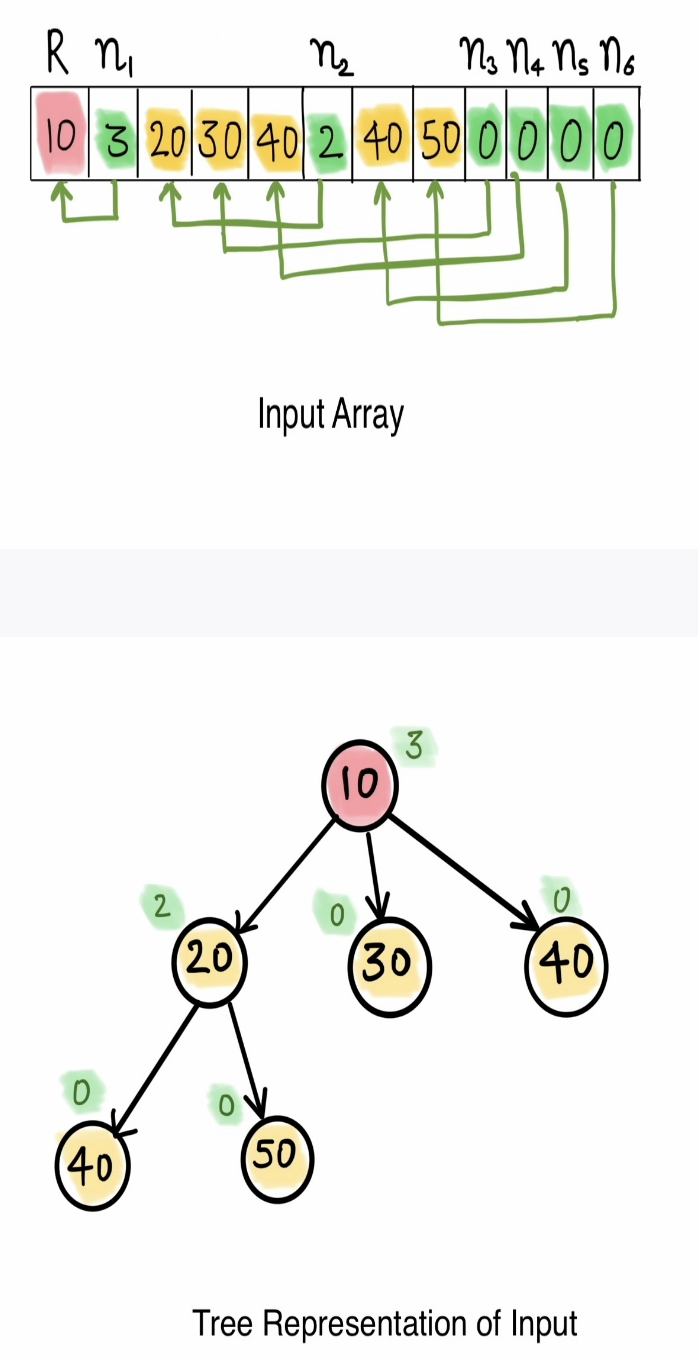


Problem Breakdown:

Input Format: The input is in level-order form, where the root data is followed by the number of its children, then the children data, and so on for all nodes.
Leaf Node: A node is considered a leaf if it has no children.
Output Format: After removing all the leaf nodes, the tree should be printed level-wise, with each level on a new line.
Plan:
Tree Construction: First, we need to construct the tree from the input in level-order form.
Recursive Removal of Leaf Nodes:
For each node, check its children.
Remove all children that are leaf nodes.
Recursively call this function for each child that is not a leaf.
Level Order Printing: After removing the leaf nodes, print the tree level-wise.
Algorithm:
Step 1: Parse Input:

The input is a space-separated list where the first element is the root value, followed by the number of children, and then the values of its children.
Step 2: Remove Leaf Nodes:

Traverse the tree recursively, and for each node, remove its children if they are leaf nodes.
Step 3: Print the Tree Level-wise:

After removing the leaf nodes, print the updated tree in level-order form.


Time Complexity:
O(n) where n is the number of nodes in the tree. We visit each node once during the construction and removal process.
Space Complexity:
O(n) for the recursion stack and the queue used in level-order traversal.

In [ ]:
class TreeNode:
    def __init__(self, data):
        self.data = data
        self.children = []

# Function to take input in level order and construct the generic tree
def construct_tree_levelwise(arr):
    if len(arr) == 0:
        return None
    
    root = TreeNode(int(arr[0]))
    q = [root]
    index = 1
    while index < len(arr):
        parent = q.pop(0)
        num_children = int(arr[index])
        index += 1
        for i in range(num_children):
            child = TreeNode(int(arr[index]))
            parent.children.append(child)
            q.append(child)
            index += 1
    return root

# Function to remove leaf nodes recursively
def remove_leaf_nodes(root):
    if not root:
        return None

    # Base case: If it's a leaf node, return None
    if len(root.children) == 0:
        return None

    # Recursively remove leaf nodes for all children
    non_leaf_children = []
    for child in root.children:
        updated_child = remove_leaf_nodes(child)
        if updated_child:
            non_leaf_children.append(updated_child)

    # Update the current node's children
    root.children = non_leaf_children

    return root

# Function to print the tree level-wise
def print_level_order(root):
    if not root:
        return
    q = [root]
    while q:
        level_size = len(q)
        current_level = []
        for _ in range(level_size):
            node = q.pop(0)
            current_level.append(str(node.data))
            for child in node.children:
                q.append(child)
        print(" ".join(current_level))

# Main function to process the input, remove leaf nodes, and print the result
def main():
    arr = input().split()
    root = construct_tree_levelwise(arr)
    updated_root = remove_leaf_nodes(root)
    print_level_order(updated_root)

# Example:
# Input: 10 3 20 30 40 2 50 60 0 0 0 0 0
# Explanation:
# Tree structure:
#           10
#       /    |    \
#     20    30    40
#    /  \
#   50   60
# After removing leaf nodes, the tree becomes:
#           10
#       /
#     20
main()
